---
## Exercise 4: Plugin Classifier

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def generate_dataset(avg, std, py, n_samples=100):
        
    n0 = int(n_samples * py[0])
    n1 = n_samples - n0
    
    x0 = stats.norm.rvs(loc=avg[0], scale=std[0], size=n0)
    x1 = stats.norm.rvs(loc=avg[1], scale=std[1], size=n1)
    y0 = np.zeros(n0)  
    y1 = np.ones(n1)  
    
    X = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1])

    return X, y

In [3]:
class PluginClassifier:

    def fit(self, X, y):
        x0 = X[y == 0]
        x1 = X[y == 1]
        
        # estimate parameters
        avg0 = np.mean(x0)
        std0 = np.std(x0)
        avg1 = np.mean(x1)
        std1 = np.std(x1)
        
        # priors
        py0 = len(x0) / len(X)
        py1 = len(x1) / len(X)

        self.avg = [avg0, avg1]
        self.std = [std0, std1]
        self.py = [py0, py1]


    def score(self, X, y):
        avg = self.avg
        std = self.std
        py = self.py
        
        p0 = stats.norm.pdf(X, avg[0], std[0]) * py[0]
        p1 = stats.norm.pdf(X, avg[1], std[1]) * py[1]
        y_pred = (p1 >= p0).astype(int)

        return np.mean(y_pred == y)

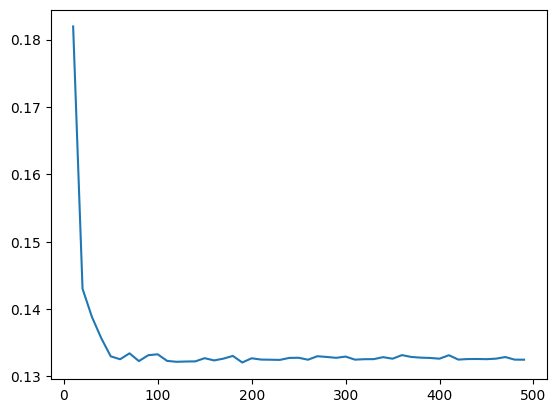

In [4]:
n_trials = 500
n_samples = np.arange(10, 500, 10)
avg = [170, 180]
std = [6., 6.]
py=[0.5, 0.5]

X_test, y_test = generate_dataset(avg=[165, 180], std=[5., 7.], py=[0.5, 0.5], n_samples=10000)

avg_errors = []
for n in n_samples:
    errors_by_n = []
    for _ in range(n_trials):
        X_train, y_train = generate_dataset(avg=avg, std=std, py=py, n_samples=n)
        clf = PluginClassifier()
        clf.fit(X_train, y_train)
        err = 1.-clf.score(X_test, y_test)
        errors_by_n.append(err)
    avg_errors.append(np.array(errors_by_n).mean())

plt.plot(n_samples, avg_errors)
plt.show()

